In [1]:
# 忽略警告提示
import warnings
warnings.filterwarnings('ignore')

# 导入数据分析包
import pandas as pd
import numpy as np

# 导入数据可视化包
import matplotlib.pyplot as plt
import seaborn as sns

# 导入数据
train_df = pd.read_csv('./titanic/train.csv',encoding='gbk')
test_df = pd.read_csv('./titanic/test.csv',encoding='gbk')
print('训练数据集:',train_df.shape,'测试数据集:',test_df.shape)

训练数据集: (891, 12) 测试数据集: (418, 11)


In [90]:
# 查看训练数据
print('train data ==============>>>>')
train_df.head()

train data ==============>>>>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [17]:
# 查看测试数据
print('test data ==============>>>>')
test_df.head()


test data ==============>>>>


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
'''
describe只能查看数据类型为数值的列的描述统计信息
对于其他类型的数据describe结果不显示，比如字符串类型的姓名（name），客舱号（cabin)
因为描述统计指标是计算数值，所以需要该列的数据类型是数值
'''
# 获取训练数据的列描述统计信息
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 获取测试数据的列描述统计信息
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# 查看训练数据的缺失情况
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 查看测试数据的缺失值数量
test_df.isnull().sum().sort_values(ascending=False)

,Total,Percent
Cabin,687,77.104377
Embarked,2,0.224467


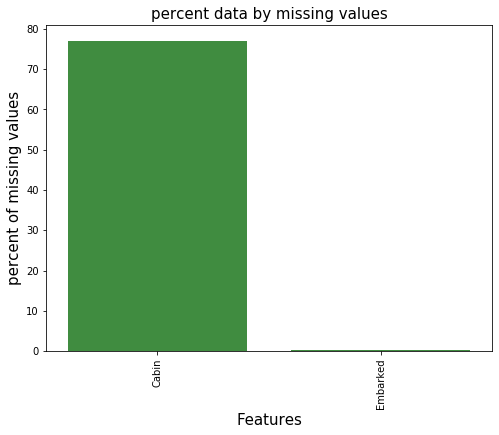

In [14]:
# 定义一个缺失数据可视化的函数
def missingData(data):
    '''
    type data: pandas.DateFrame
    rtype: pandas.DateFrame
    '''
    # 获取缺失数据情况series
    total = data.isnull().sum().sort_values(ascending=False)
    #     获取缺失数据的百分比
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    #     合并数据缺失情况和百分比
    ms = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    #   hasattr 仅保留有缺失数据的行
    ms = ms[ms['Percent']>0]
    #   set 缺失数据可视化
    f,ax = plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig = sns.barplot(ms.index,ms['Percent'],color='green',alpha=0.8)
    plt.xlabel('Features',fontsize=15)
    plt.ylabel('percent of missing values',fontsize=15)
    plt.title('percent data by missing values',fontsize=15)
    return ms

# kset视化训练数据的缺失情况
missingData(train_df)

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


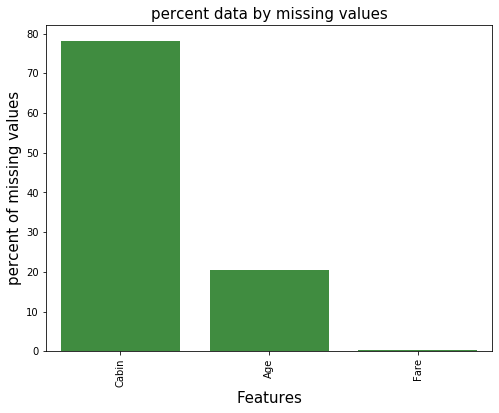

In [15]:
# 可视化测试数据的缺失情况
missingData(test_df)

#   填充数值类型的缺失值

In [16]:

# train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
print('填充后训练数据缺失数量：',train_df.isnull().sum())

填充后训练数据缺失数量： PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)
print('填充后测试数据缺失数量：',test_df.isnull().sum())

填充后测试数据缺失数量： PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [23]:
print('查看训练数据缺失情况：',train_df.isnull().sum())

查看训练数据缺失情况： PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


# 填充类别型数据的缺失值

In [21]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

# 缺失比例较高的数据的处理办法

In [25]:
train_df['Cabin'].fillna('U',inplace=True)
print('填充后训练数据缺失数据的情况')
train_df.isnull().sum().sort_values(axis=0,ascending=False)

填充后训练数据缺失数据的情况


Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [27]:
test_df['Cabin'].fillna('U',inplace=True)
print('填充后测试数据缺失数据的情况')
test_df.isnull().sum().sort_values(axis=0,ascending=False)

填充后测试数据缺失数据的情况


Embarked       0
Cabin          0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

# 特征的变换和生成

In [28]:
# 合并测试数据集和训练数据集
full_df = train_df.append(test_df,ignore_index=True)
print('合并后数据集',full_df.shape)

合并后数据集 (1309, 12)


In [29]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [30]:
full_df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.437487,33.281086,0.385027,655.000000,2.294882,0.498854,0.383838
std,12.915275,51.741500,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,35.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


# 类别型特征数据

In [31]:
# 性别数据
full_df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [35]:
'''
将性别数据映射为数值
男male对应数值1,女female对应数值0
'''
sex_mapDict = {'male':1,'female':0}
# 使用map函数映射
full_df['Sex'] = full_df['Sex'].map(sex_mapDict)
full_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,U,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,U,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,U,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


In [36]:
'''
登船港口Embarked的值是:
出发地点:S = Southampton 英国南安普顿
途径1:C = Cherbourg 法国瑟堡市
途径1:Q = Queenstown 爱尔兰昆士敦

'''
# 查看该类型数据
full_df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [37]:
# 存放提取后特征
embarkedDf = pd.DataFrame()
'''
使用 get_dummies进行one-hot编码,产生虚拟变量dummy_variables,列前缀是Embarked
'''
embarkedDf = pd.get_dummies(full_df['Embarked'],prefix='Embarked')
embarkedDf

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [38]:
# 将one-hot编码的登船港口数据，加入到full_df的DataFrame中
full_df = pd.concat([full_df,embarkedDf],axis=1)
'''
因为已经使用登船港口进行了one-hot编码产生了它的蓄力变量dummy_variables
可以删除登船港口
'''
full_df.drop('Embarked',axis=1,inplace=True)
full_df.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S
0,22.0,U,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,1,0,0
2,26.0,U,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,0,1
4,35.0,U,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,0,0,1


In [40]:
# 客舱等级
# 1=1客舱,2=2客舱,3=3客舱
# 统计客舱等级数量
full_df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [41]:
# 存放客舱等级数量
pclassDf = pd.DataFrame()
# 使用get_dummies对客舱数据进行one-hot编码
pclassDf = pd.get_dummies(data=full_df['Pclass'],prefix='Pclass')
pclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [42]:
# 将pclassDf中one-hot编码后的数据添加至full_df，
full_df = pd.concat([full_df,pclassDf],axis=1)
# 并删除原Pclass列
full_df.drop(labels='Pclass', axis=1,inplace=True,)
full_df.head()

,Age,Cabin,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,U,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,0.0,A/5 21171,0,0,1,0,0,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,1.0,PC 17599,1,0,0,1,0,0
2,26.0,U,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,STON/O2. 3101282,0,0,1,0,0,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,1,1.0,113803,0,0,1,1,0,0
4,35.0,U,8.0500,"Allen, Mr. William Henry",0,5,1,0,0.0,373450,0,0,1,0,0,1


# 字符串类型特征数据
# 字符串类型的数据包括乘客姓名（Name）、客舱号（Cabin）和船票编号（Ticket）数据，下面分别介绍这三列数据的处理。


In [45]:
# 查看乘客姓名（'Name'）这一列数据的大概情况，可以看到该列数据是字符串类型的数据，在姓名的中间有一个称谓，该称谓会可以体现乘客的婚姻状况和职业等信息
# 比如 mr,miss,mrs,master
train_df['Name'].head(10)


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [48]:
'''
通过姓名获取乘客title,并统计title的种类和数量
'''
import re
# 定义函数用于获取title
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ''
title_df = full_df['Name'].apply(get_title)
title_df.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Countess      1
Don           1
Capt          1
Mme           1
Jonkheer      1
Dona          1
Lady          1
Sir           1
Name: Name, dtype: int64

In [49]:
'''
定义如下类别:
Officer政府官员，包括title: Capt, Col, Major, Dr, Rev
Royalty王室（皇室），包括title: Jonkheer, Don, Sir, Countess, Dona, Lady
Mr已婚男士，包括title: Mr
Mrs已婚妇女，包括title: Mrs, Mme, Ms
Miss年轻未婚女子，包括title: Miss, Mlle
Master有技能的人/教师，包括title: Master
'''
# 称谓的分类我们通过replace()函数实现
title_df = title_df.replace(['Capt','Col', 'Major', 'Dr', 'Rev'],'Officer')
title_df = title_df.replace(['Jonkheer', 'Don', 'Sir', 'Countess', 'Dona', 'Lady'],'Royalty')
title_df = title_df.replace(['Mr'],'Mr')
title_df = title_df.replace(['Mrs', 'Mme', 'Ms'],'Mrs')
title_df = title_df.replace(['Miss', 'Mlle'],'Miss')
title_df = title_df.replace(['Master'],'Master')
title_df.value_counts()


Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Name, dtype: int64

In [50]:
# Title分类以后，我们再通过get_dummies()函数将其转换为one-hot编码的数据，如下代码和其输出的结果：
title_df = pd.get_dummies(title_df)
title_df.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [51]:
# 我们将one-hot编码后的title数据加入full_df数据，并删除原title列的数据，方便后续处理。
full_df = pd.concat([full_df,title_df],axis=1)
full_df.drop('Name',axis=1,inplace=True)
full_df.head(10)

,Age,Cabin,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Embarked_C,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Master,Miss,Mr,Mrs,Officer,Royalty
0,22.0,U,7.2500,0,1,1,1,0.0,A/5 21171,0,...,1,0,0,1,0,0,1,0,0,0
1,38.0,C85,71.2833,0,2,0,1,1.0,PC 17599,1,...,0,1,0,0,0,0,0,1,0,0
2,26.0,U,7.9250,0,3,0,0,1.0,STON/O2. 3101282,0,...,1,0,0,1,0,1,0,0,0,0
3,35.0,C123,53.1000,0,4,0,1,1.0,113803,0,...,1,1,0,0,0,0,0,1,0,0
4,35.0,U,8.0500,0,5,1,0,0.0,373450,0,...,1,0,0,1,0,0,1,0,0,0
5,28.0,U,8.4583,0,6,1,0,0.0,330877,0,...,0,0,0,1,0,0,1,0,0,0
6,54.0,E46,51.8625,0,7,1,0,0.0,17463,0,...,1,1,0,0,0,0,1,0,0,0
7,2.0,U,21.0750,1,8,1,3,0.0,349909,0,...,1,0,0,1,1,0,0,0,0,0
8,27.0,U,11.1333,2,9,0,0,1.0,347742,0,...,1,0,0,1,0,0,0,1,0,0
9,14.0,U,30.0708,0,10,0,1,1.0,237736,1,...,0,0,1,0,0,0,0,1,0,0


In [52]:
# 客舱的首字母是客舱的类别
# 客舱等级数据
full_df['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [54]:
# 存放客舱号信息
cabin_df = pd.DataFrame()
# 客舱的类别是首字母
full_df['Cabin'] = full_df['Cabin'].map( lambda c: c[0])
# 通过get_dummies函数将其转换为one-hot编码的数据 前缀是Cabin
cabin_df = pd.get_dummies(full_df['Cabin'],prefix='Cabin')
cabin_df.head(10)

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1


In [55]:
# 将one-hot编码后的title数据加入full_df数据，并删除原Cabin列的数据
full_df = pd.concat([full_df,cabin_df],axis=1)
# 删除客舱等级
full_df.drop('Cabin',axis=1,inplace=True)
full_df.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Embarked_C,Embarked_Q,...,Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,7.2500,0,1,1,1,0.0,A/5 21171,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,0,2,0,1,1.0,PC 17599,1,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,0,3,0,0,1.0,STON/O2. 3101282,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,0,4,0,1,1.0,113803,0,0,...,0,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,0,5,1,0,0.0,373450,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
# 得到的船票编号的类型和数量分布特性
full_df['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
S.O.C. 14879     7
347082           7
                ..
348122           1
343275           1
C.A. 31026       1
113056           1
349231           1
Name: Ticket, Length: 929, dtype: int64

In [57]:
# 删除Ticket列数据
full_df.drop('Ticket',axis=1,inplace=True)
full_df.columns

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Sex', 'SibSp', 'Survived',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U'],
      dtype='object')

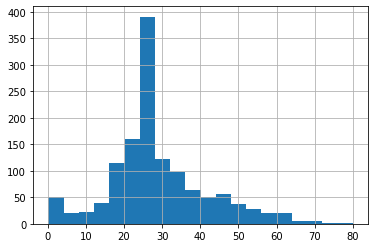

In [58]:
# 通过DataFrame.hist()函数查看年龄的分布情况
full_df['Age'].hist(bins=20)

In [59]:
# 存放年龄分段数据
age_df = pd.DataFrame()
# 对年龄进行分段处理
age_df = pd.cut(full_df['Age'],bins=[0,12,20,40,90],labels=['Children','Teenage','Adult','Elder'])
age_df.value_counts()

Adult       834
Elder       227
Teenage     154
Children     94
Name: Age, dtype: int64

In [60]:
# 对分段后的数据进行one-hot编码
age_df= pd.get_dummies(age_df,prefix='Age')
age_df.head()


,Age_Children,Age_Teenage,Age_Adult,Age_Elder
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [62]:
# 将one-hot编码后的年龄数据存入full_df变量中
full_df = pd.concat([full_df,age_df],axis=1)
full_df.head(10)

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_T,Cabin_U,Age_Children,Age_Teenage,Age_Adult,Age_Elder,Age_Children,Age_Teenage,Age_Adult,Age_Elder
0,22.0,7.2500,0,1,1,1,0.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,38.0,71.2833,0,2,0,1,1.0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,26.0,7.9250,0,3,0,0,1.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,35.0,53.1000,0,4,0,1,1.0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,35.0,8.0500,0,5,1,0,0.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
5,28.0,8.4583,0,6,1,0,0.0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
6,54.0,51.8625,0,7,1,0,0.0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
7,2.0,21.0750,1,8,1,3,0.0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
8,27.0,11.1333,2,9,0,0,1.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
9,14.0,30.0708,0,10,0,1,1.0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


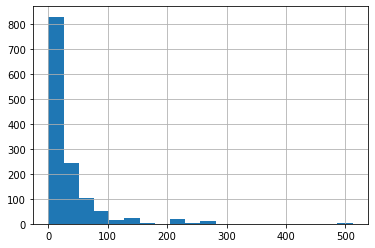

In [63]:
# 通过DataFrame.hist()观察船票费用数据的分布情况，可以看出船票价格呈现出低价到高价逐渐减少的趋势
full_df['Fare'].hist(bins=20)

In [65]:
# 通过DataFrame.describe()函数查看船票费用数据分统计数据
full_df['Fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [66]:
'''对船票费用进行如下分段，0~7.90为低船票费用段，
7.91~14.45为中低船票费用段，14.45-31.28为中高船票费用点，31-520为高船票费用段。我们分段后，再查看这四个船票费用段的乘客数量
'''

fare_df = pd.cut(full_df['Fare'],bins=[0,7.9,14.45,31.28,520],labels=['low','middleLow','middleHigh','high'])
# 查看分段后的费用情况
fare_df.value_counts()

middleHigh    339
high          323
low           320
middleLow     310
Name: Fare, dtype: int64

In [67]:
# 对分段的船票费用数据进行one-hot编码
fare_df = pd.get_dummies(data=fare_df,prefix='Fare')
fare_df.head()

,Fare_low,Fare_middleLow,Fare_middleHigh,Fare_high
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [68]:
# 将one-hot编码的船票费用分段数据添加至full_df中
full_df = pd.concat([full_df,fare_df],axis=1)
full_df.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,...,Age_Adult,Age_Elder,Age_Children,Age_Teenage,Age_Adult,Age_Elder,Fare_low,Fare_middleLow,Fare_middleHigh,Fare_high
0,22.0,7.2500,0,1,1,1,0.0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
1,38.0,71.2833,0,2,0,1,1.0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,26.0,7.9250,0,3,0,0,1.0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,35.0,53.1000,0,4,0,1,1.0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,35.0,8.0500,0,5,1,0,0.0,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [69]:
'''
获取家庭人数的数据
家庭人数 = 不同代亲属Parch + 同代亲属SibSp + 乘客自己
自己也是家庭成员之一所以+1
'''
family_df = pd.DataFrame()
family_df['FamilySize'] = full_df['Parch'] + full_df['SibSp'] +1
family_df['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [77]:
'''
获取家庭类数据
Family_Single单身家庭、 家庭人数=1
Family_Small小家庭 2<=家庭人数<=4
Family_Large大家庭 家庭人数>5
'''


family_df['Family_Single'] = family_df['FamilySize'].map( lambda s: 1 if s==1 else 0 )
family_df['Family_Small'] = family_df['FamilySize'].map( lambda s: 1 if 2<=s<=4 else 0 )
family_df['Family_Large'] = family_df['FamilySize'].map( lambda s: 1 if 5<=s else 0 )
family_df.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [78]:
# 将家庭人数和家庭类别的数据加入到整体数据full_df中
full_df = pd.concat([full_df,family_df],axis=1)
full_df.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,...,Age_Adult,Age_Elder,Fare_low,Fare_middleLow,Fare_middleHigh,Fare_high,FamilySize,Family_Single,Family_Small,Family_Large
0,22.0,7.2500,0,1,1,1,0.0,0,0,1,...,1,0,1,0,0,0,2,0,1,0
1,38.0,71.2833,0,2,0,1,1.0,1,0,0,...,1,0,0,0,0,1,2,0,1,0
2,26.0,7.9250,0,3,0,0,1.0,0,0,1,...,1,0,0,1,0,0,1,1,0,0
3,35.0,53.1000,0,4,0,1,1.0,0,0,1,...,1,0,0,0,0,1,2,0,1,0
4,35.0,8.0500,0,5,1,0,0.0,0,0,1,...,1,0,0,1,0,0,1,1,0,0


# 特征选择

In [80]:
# 查看当前特征数量
print('t特征数据处理后的特征数量:',full_df.shape[1])

t特征数据处理后的特征数量: 44


In [3]:
# 将训练数据从full_df中提取出来
train_df = full_df.loc[0:890,:]
# 将是否存活survived这一列数据提取出来
survived_df = full_df.Survived
train_df.drop(columns='Survived',inplace=True)
# 再将survived列添加到train_df的第一列
train_df.insert(0,'Survived',survived_df)
# 因为训练数据有survived列,仅仅对训练数据计算相关系数
corr_df = train_df.corr()
corr_df

NameError: name 'full_df' is not defined

In [93]:
# 查看各个特征与Survived生存的相关系数 ascending=Fasle表示降序排列
features_sorted = abs(corr_df['Survived']).sort_values(ascending=False) 
features_sorted

Survived           1.000000
Mr                 0.549199
Sex                0.543351
Mrs                0.344935
Miss               0.332795
Pclass_3           0.322308
Cabin_U            0.316912
Pclass_1           0.285904
Family_Small       0.279855
Fare               0.257307
Fare_high          0.250670
Family_Single      0.203367
Fare_low           0.200973
Cabin_B            0.175095
Embarked_C         0.168240
Cabin_D            0.150716
Embarked_S         0.149683
Cabin_E            0.145321
Family_Large       0.125147
Age_Children       0.116691
Age_Children       0.116691
Cabin_C            0.114652
Pclass_2           0.093349
Fare_middleLow     0.087603
Master             0.085221
Parch              0.081629
Age                0.064910
Fare_middleHigh    0.059696
Cabin_F            0.057935
Age_Adult          0.051250
Age_Adult          0.051250
SibSp              0.035322
Royalty            0.033391
Officer            0.031316
Cabin_T            0.026456
Cabin_A            0

In [104]:
'''
根据相关系数排序结果，我们将以下特征作为训练模型使输入的特征：

称谓，包含这几列数据：'Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'。
客舱等级，包含这几列数据：'Pclass_1', 'Pclass_2', 'Pclass_3'。
船票费用，包含这几列数据：'Fare'。
客舱编号，包含这几列数据：'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E'、'Cabin_F', 'Cabin_G', 'Cabin_T','Cabin_U'。
登船港口，包含这几列数据：'Embarked_C', 'Embarked_Q', 'Embarked_S'。
家庭人数和类别，包含这几列数据：'FamilySize', 'Family_Single', 'Family_Small', 'Family_Large'。
年龄，包含这几列数据：'age_Children', 'age_Teenage', 'age_Adult', 'age_Elder'）。注意这里因为'Age'列于Survived的相关系数太小，所以我们没有考虑'Age'列，而将年龄的分段数据加入训练模型用的特征。
性别，包含这几列数据：'Sex'。
'''


# 存放用于模型训练的特征columns名称
columns_selcd = ['Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty',
                'Pclass_1', 'Pclass_2', 'Pclass_3',
                 'Fare',
                 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E','Cabin_F', 'Cabin_G', 'Cabin_T','Cabin_U',
                 'Embarked_C', 'Embarked_Q', 'Embarked_S',
                 'FamilySize', 'Family_Single', 'Family_Small', 'Family_Large',
                 'Age_Children', 'Age_Teenage', 'Age_Adult', 'Age_Elder',
                 'Sex'
                ]

# 将特征列和标签列分别存放
features_selcd = train_df[columns_selcd]
labels = train_df['Survived']

# 建立训练子集和测试子集


In [105]:
#  将训练数据分别建立60%训练子集和20%测试子集和20%交叉验证子集
# 采用sklearn.model_selection.train_test_split进行数据的随机划分
from sklearn.model_selection import train_test_split #导入数据分割包
from sklearn.metrics import accuracy_score #导入accuracy_score,用于计算模型的准确率

# 将kaggle 提供的数据分割为60%训练子集和20%测试子集和20%交叉验证子集
# 测试子集便于自己测试模型的性能

X_train,X_test,Y_train,Y_test = train_test_split(features_selcd,labels,train_size=0.8)

print('训练子集特征数据量:',X_train.shape)
print('测试子集特征数据量:',X_test.shape)
print('训练子集标签数据量:',Y_train.shape)
print('训练子集标签数据量:',Y_test.shape)

训练子集特征数据量: (712, 35)
测试子集特征数据量: (179, 35)
训练子集标签数据量: (712,)
训练子集标签数据量: (179,)


# 模型的训练和评估

In [108]:
'''刚刚入门机器学习还没有深入学习其他模型的缘故，
我这里采用逻辑回归作为模型，通过model.fit()函数对模型进行训练，并通过刚才分离出来的测试子集对训练的模型进行准确率的计算。
'''

'''
模型训练
通过训练子集和model.fit()函数训练模型
'''
# 导入model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
prediction_lr = model.predict(X_test)
prediction_lr[0:5]

'''
模型的评估
通过测试子集和 model.predict()accuracy_score()来计算准确率
'''
print('--------------------------模型准确率---------------------')
print('逻辑回归模型准确率:',round(accuracy_score(prediction_lr,Y_test)*100,2))

--------------------------模型准确率---------------------
逻辑回归模型准确率: 83.24
